In [1]:
#import required moules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
traindf=pd.read_csv('fraudTrain.csv')

In [3]:
traindf

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
testdf=pd.read_csv('fraudTest.csv')

In [6]:
testdf

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [7]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
#copy
df1=traindf 
df2=testdf

In [9]:
df1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [10]:
#drop unrequired columns (those who not help to find the fraud)
drop_cols = ['Unnamed: 0', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time','job']
df1 = df1.drop(columns=drop_cols)

In [11]:
df1

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,42.788940,-103.241160,0


In [12]:
drop_cols = ['Unnamed: 0', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time','job']
df2 = df2.drop(columns=drop_cols)

In [13]:
#convert to datetime
for df in [df1, df2]:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# extract features
for df in [df1, df2]:
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek


In [14]:
df1

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day_of_week
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0,0,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0,0,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0,0,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,36.841266,-111.690765,0,12,6
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,38.906881,-78.246528,0,12,6
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,33.619513,-105.130529,0,12,6
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,42.788940,-103.241160,0,12,6


In [15]:
df2

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day_of_week
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,33.986391,-81.200714,0,12,6
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,39.450498,-109.960431,0,12,6
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,40.495810,-74.196111,0,12,6
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,28.812398,-80.883061,0,12,6
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,44.959148,-85.884734,0,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,39.946837,-91.333331,0,23,3
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,29.661049,-96.186633,0,23,3
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,46.658340,-119.715054,0,23,3
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,44.470525,-117.080888,0,23,3


In [16]:
#drop trans_date_trans_time column
df1 = df1.drop(columns=['trans_date_trans_time'])
df2 = df2.drop(columns=['trans_date_trans_time'])

In [17]:
df2

,cc_num,merchant,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day_of_week
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,33.986391,-81.200714,0,12,6
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,39.450498,-109.960431,0,12,6
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,40.495810,-74.196111,0,12,6
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,28.812398,-80.883061,0,12,6
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,44.959148,-85.884734,0,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,39.946837,-91.333331,0,23,3
555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,29.661049,-96.186633,0,23,3
555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,46.658340,-119.715054,0,23,3
555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,44.470525,-117.080888,0,23,3


In [18]:
#to convert the word into the number 
cols = ['merchant', 'category', 'gender']
le = LabelEncoder()
for col in cols:
    df1[col] = le.fit_transform(df1[col])
    df2[col] = le.transform(df2[col])

In [19]:
df1

,cc_num,merchant,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day_of_week
0,2703186189652095,514,8,4.97,0,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,1
1,630423337322,241,4,107.23,0,48.8878,-118.2105,149,49.159047,-118.186462,0,0,1
2,38859492057661,390,0,220.11,1,42.1808,-112.2620,4154,43.150704,-112.154481,0,0,1
3,3534093764340240,360,2,45.00,1,46.2306,-112.1138,1939,47.034331,-112.561071,0,0,1
4,375534208663984,297,9,41.96,1,38.4207,-79.4629,99,38.674999,-78.632459,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,499,0,15.56,1,37.7175,-112.4777,258,36.841266,-111.690765,0,12,6
1296671,6011149206456997,2,1,51.70,1,39.2667,-77.5101,100,38.906881,-78.246528,0,12,6
1296672,3514865930894695,599,1,105.93,1,32.9396,-105.8189,899,33.619513,-105.130529,0,12,6
1296673,2720012583106919,509,1,74.90,1,43.3526,-102.5411,1126,42.788940,-103.241160,0,12,6


In [20]:
X_train = df1.drop('is_fraud', axis=1)
y_train = df1['is_fraud']

X_test = df2.drop('is_fraud', axis=1)
y_test = df2['is_fraud']

In [21]:
X_train

,cc_num,merchant,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,hour,day_of_week
0,2703186189652095,514,8,4.97,0,36.0788,-81.1781,3495,36.011293,-82.048315,0,1
1,630423337322,241,4,107.23,0,48.8878,-118.2105,149,49.159047,-118.186462,0,1
2,38859492057661,390,0,220.11,1,42.1808,-112.2620,4154,43.150704,-112.154481,0,1
3,3534093764340240,360,2,45.00,1,46.2306,-112.1138,1939,47.034331,-112.561071,0,1
4,375534208663984,297,9,41.96,1,38.4207,-79.4629,99,38.674999,-78.632459,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,499,0,15.56,1,37.7175,-112.4777,258,36.841266,-111.690765,12,6
1296671,6011149206456997,2,1,51.70,1,39.2667,-77.5101,100,38.906881,-78.246528,12,6
1296672,3514865930894695,599,1,105.93,1,32.9396,-105.8189,899,33.619513,-105.130529,12,6
1296673,2720012583106919,509,1,74.90,1,43.3526,-102.5411,1126,42.788940,-103.241160,12,6


In [22]:
y_train

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [23]:
#for normalization
scale_cols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long']
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [24]:
# using randomforestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [25]:
y_pred = model.predict(X_test)#predict the test dataset
y_prob = model.predict_proba(X_test)[:,1]

In [26]:
from sklearn.metrics import accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# # Confusion matrix
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

#Receiver Operating Characteristic score
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)

Accuracy of the model: 0.9984

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.91      0.64      0.75      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.82      0.88    555719
weighted avg       1.00      1.00      1.00    555719

ROC-AUC Score: 0.967661434103861


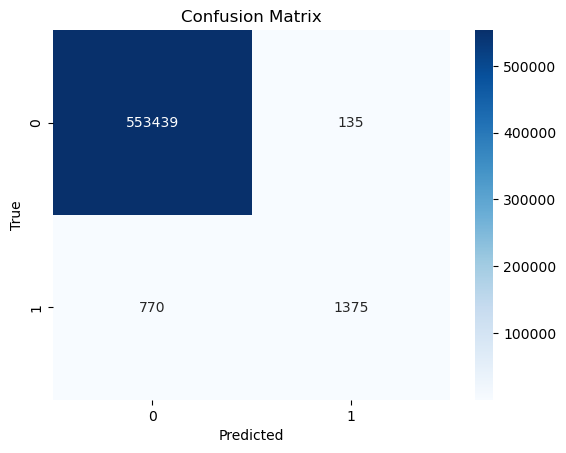

In [27]:
#show confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

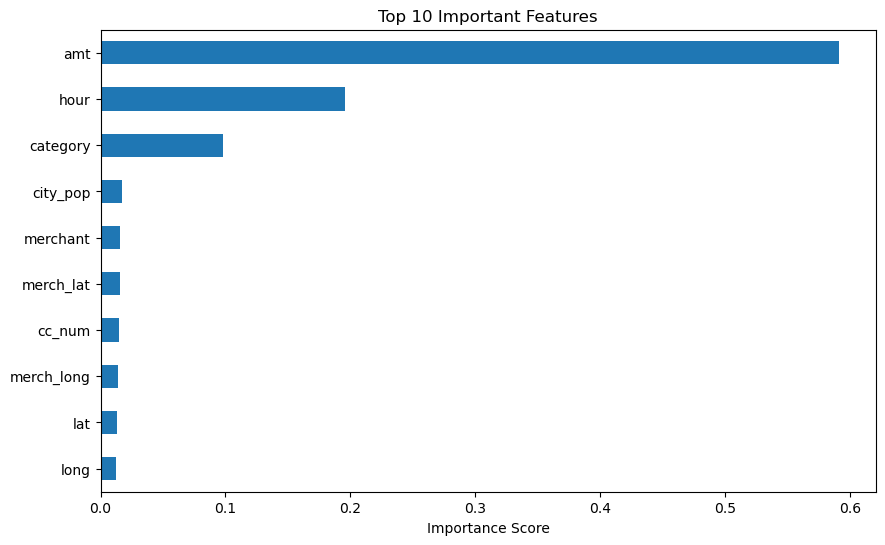

In [28]:
importances = model.feature_importances_
# Match importances with feature names
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names)

# Sort feature importances (descending order)
feat_imp = feat_imp.sort_values(ascending=False)

# Plot the top important features
plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='barh')
plt.gca().invert_yaxis()  # Sabse important feature top pe dikhega
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.show()
